<a href="https://colab.research.google.com/github/yaroslav711/ml_spring2021/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (0 баллов) Считываем данные

In [ ]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = dataset['data'] #MinMaxScaler().fit_transform(dataset['data'])
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [ ]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE и посчитайте своей результат на тестовой части.

In [ ]:
def MSE(y_real, y_pred):
    return (((y_real - y_pred)**2).sum())/(len(y_pred))

In [ ]:
MSE(y_test, y_pred)

14.995852876582568

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
y_pred_naiv = np.array([y_train.mean()]*len(y_test))
y_pred_naiv

array([22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549, 22.69450549, 22.69450549, 22.69450549, 22.69450549,
       22.69450549])

In [ ]:
MSE(y_test, y_pred_naiv)

65.00802631111615

Линейная регрессия сильно выигрывает наивный алгоритм, примерно в 4 раза лучше из "коробки"

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

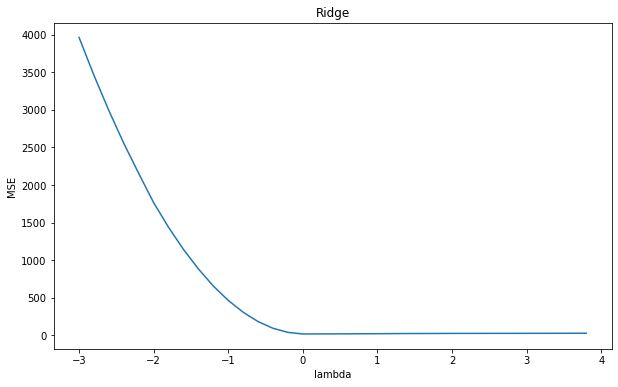

best MSE: 14.995852876582632, best lambda: 2.6645352591003757e-15


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lambdas = np.arange(-3, 4.0, 0.2)

lambda_errors = []

for val in lambdas:
    model = Lasso(alpha=val)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append(MSE(y_test, preds))


    
#plot diagram
plt.figure(figsize=(10, 6))
plt.plot(lambdas, lambda_errors)
plt.title('Ridge')
plt.ylabel('MSE')
plt.xlabel('lambda')
plt.show()
print(f'best MSE: {np.amin(lambda_errors)}, best lambda: {lambdas[np.argmin(lambda_errors)]}')

In [ ]:
df = pd.DataFrame(X, columns = dataset['feature_names'])
df['Y'] = dataset['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Полиномиальные фичи

In [ ]:
import warnings
warnings.filterwarnings('ignore')
results = []
train_df = pd.DataFrame(X_train, columns = dataset['feature_names'])
for feature in dataset['feature_names']:
    X_poly = train_df.copy()
    for i in range(2, 6):
        X_poly[feature] = np.power(X_poly[feature], i)

        model = Ridge(alpha=1.1)
        results.append((-np.average(cross_val_score(model, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')), i, feature))
print(sorted(results)[0])

(21.320769491244157, 3, 'RM')


In [ ]:
df['RM^3'] = np.power(df['RM'], 3)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y,RM^3
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,284.241359
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,264.732956
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,370.920057
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,342.706084
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,365.065966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,286.582210
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,229.220928
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,339.484082
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,313.600414


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Y'], axis=1), df['Y'], test_size=0.1, random_state=42)

## Умножаем признаки между собой

In [ ]:
from itertools import combinations
columns_list = dataset['feature_names']
interactions = list(combinations(columns_list, 2))
interactions[0:5]

[('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM')]

In [ ]:
MSE_features = []
for interaction in interactions:
    X_df = pd.DataFrame(X_train, columns = df.drop(['Y'], axis=1).columns)
    new_feature = X_df[interaction[0]] * X_df[interaction[1]]
    X_df['new_feature'] = new_feature
    model = Lasso(alpha=0.1)
    
    MSE_features.append((-np.average(cross_val_score(model, X_df, y_train, cv=5, scoring='neg_mean_squared_error')), interaction))
best_features = sorted(MSE_features)[0]
best_features

(19.0750168829266, ('RM', 'TAX'))

In [ ]:
df['RM*TAX'] = df['RM'] * df['TAX']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y,RM^3,RM*TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,284.241359,1946.200
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,264.732956,1553.882
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,370.920057,1738.770
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,342.706084,1553.556
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,365.065966,1586.634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,286.582210,1799.889
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,229.220928,1670.760
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,339.484082,1904.448
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,313.600414,1854.762


### Используем StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df.drop(['Y'], axis=1)) #MinMaxScaler().fit_transform(df.drop(['Y'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

Выберем лучший коэффициент регуляризации

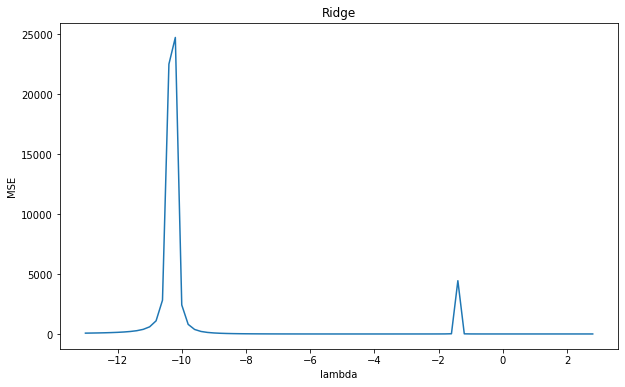

best MSE: 6.148610580311191, best lambda: -4.4000000000000306


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lambdas = np.arange(-13, 3.0, 0.2)

lambda_errors = []

for val in lambdas:
    model = Ridge(alpha=val)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append(MSE(y_test, preds))


    
#plot diagram
plt.figure(figsize=(10, 6))
plt.plot(lambdas, lambda_errors)
plt.title('Ridge')
plt.ylabel('MSE')
plt.xlabel('lambda')
plt.show()
print(f'best MSE: {np.amin(lambda_errors)}, best lambda: {lambdas[np.argmin(lambda_errors)]}')

Итоговая ошибка на тестовой выборке получилась 6.148 при использовании l2 регуляризации с lambda = -4.4

In [ ]:
model = Ridge(alpha=lambdas[np.argmin(lambda_errors)])
model.fit(X_train, y_train)
preds = model.predict(X_test)
MSE(y_test, preds)

6.148610580311191